In [1]:
!pip install textblob

In [2]:
from bs4 import BeautifulSoup as bs 
import re 
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob 
import pandas as pd
import numpy as np

# Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

In [33]:
Elon=pd.read_csv("/Users/apple/Downloads/Elon_musk.csv",index_col=0)

In [34]:
Elon

,Text
1,@kunalb11 I�m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [35]:
Elon = [Text.strip() for Text in Elon] # remove both the leading and the trailing characters
Elon = [Text for Text in Elon if Text] # removes empty strings, because they are considered in Python as False
Elon[0:10]

['Text']

In [36]:
Elon

['Text']

In [37]:
text = ' '.join(Elon)
text

'Text'

In [39]:
import string
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'Text'

In [40]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Text']


In [41]:
len(text_tokens)

1

In [42]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['Text']


[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>
[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


In [43]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['text']


In [44]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['text']


In [46]:
import spacy

In [49]:
nlp = spacy.load('en_core_web_sm')

one_block = Elon[0]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

/opt/anaconda3/lib/python3.8/site-packages/spacy/displacy/__init__.py:191: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [50]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Text


In [51]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['text']


## Including Bigram and Trigram

In [53]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(Elon)

In [54]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['text']
[[1]]


## Feature Extraction

In [55]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [56]:
print(vectorizer.vocabulary_)

{'text': 0}


In [57]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

[]
[]


In [58]:
print(X.toarray().shape)

(1, 1)


In [59]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

[]


## Sentiment Analysis

In [3]:
elon=pd.read_csv("/Users/apple/Downloads/Elon_musk.csv",index_col=0)

In [4]:
elon

,Text
1,@kunalb11 I�m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
def clean_text(elon):
  elon = re.sub('@[A-Za-z0–9]+', '', elon) #Removing tag(@)
  elon = re.sub('#', '', elon) # Removing hashtag(#)
  elon = re.sub('RT[\s]+', '', elon) # Removing RT
  elon = re.sub('https?:\/\/\S+', '', elon) # Removing links
  return elon
 
elon.Text = elon.Text.apply(clean_text)


In [6]:
elon

,Text
1,11 I�m an alien
2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
3,Great interview!
4,27 Doge is underestimated
5,Congratulations Tesla China for amazing execu...
...,...
1995,"True, it sounds so surreal, but the negative ..."
1996,Make sure to read ur terms &amp; conditions b...
1997,Samwise Gamgee
1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...


In [7]:
elon1=elon

### TextBlob

In [8]:
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
elon1['Polarity'] = elon1.Text.apply(calc_pola)

In [9]:
elon1.head()

,Text,Polarity
1,11 I�m an alien,-0.250000
2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000
3,Great interview!,1.000000
4,27 Doge is underestimated,0.000000
5,Congratulations Tesla China for amazing execu...,0.345313


In [10]:
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
elon1['Sentiment'] = elon1.Polarity.apply(sentiment)

elon1.head()

,Text,Polarity,Sentiment
1,11 I�m an alien,-0.250000,Negative
2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,Netural
3,Great interview!,1.000000,Positive
4,27 Doge is underestimated,0.000000,Netural
5,Congratulations Tesla China for amazing execu...,0.345313,Positive


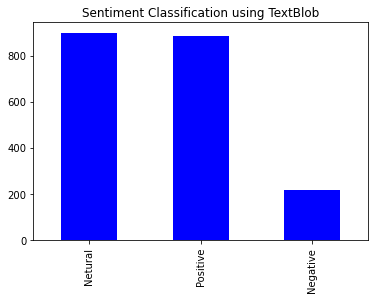

In [11]:
elon1.Sentiment.value_counts().plot(kind='bar', color='blue')
plt.title('Sentiment Classification using TextBlob')
plt.show()

In [12]:
elon1_sentiment = pd.DataFrame(elon1.Sentiment.value_counts(normalize=True)*100)
elon1_sentiment['Total'] = elon1.Sentiment.value_counts()
elon1_sentiment

,Sentiment,Total
Netural,44.972486,899
Positive,44.272136,885
Negative,10.755378,215


### Vader Lexicon

In [13]:
elon2=elon

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [15]:
def calc_pola(text):
    sia = SentimentIntensityAnalyzer()
    analysis =sia.polarity_scores(text)
    return analysis
elon2['VL_Compound'] = elon2.Text.apply(calc_pola)

In [16]:
elon2

,Text,Polarity,Sentiment,VL_Compound
1,11 I�m an alien,-0.250000,Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,Netural,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Great interview!,1.000000,Positive,"{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp..."
4,27 Doge is underestimated,0.000000,Netural,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp..."
5,Congratulations Tesla China for amazing execu...,0.345313,Positive,"{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp..."
...,...,...,...,...
1995,"True, it sounds so surreal, but the negative ...",0.111111,Positive,"{'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com..."
1996,Make sure to read ur terms &amp; conditions b...,0.625000,Positive,"{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'comp..."
1997,Samwise Gamgee,0.000000,Netural,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,-0.375000,Negative,"{'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'comp..."


In [17]:
def sentiment(text):
    sia = SentimentIntensityAnalyzer()
    analysis =sia.polarity_scores(text)
    result = ''
    if analysis['compound'] > 0:
        result = 'Positive'
    elif analysis['compound'] == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
elon2['VL_Sentiment'] = elon2.Text.apply(sentiment)

elon2.head()

,Text,Polarity,Sentiment,VL_Compound,VL_Sentiment
1,11 I�m an alien,-0.250000,Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Netural
2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,Netural,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Netural
3,Great interview!,1.000000,Positive,"{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp...",Positive
4,27 Doge is underestimated,0.000000,Netural,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",Negative
5,Congratulations Tesla China for amazing execu...,0.345313,Positive,"{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp...",Positive


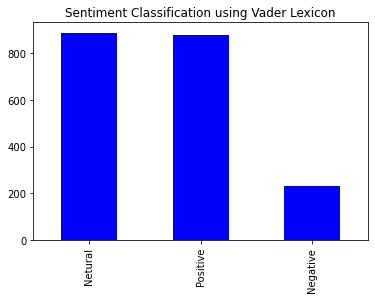

In [18]:
elon2.VL_Sentiment.value_counts().plot(kind='bar', color='blue')
plt.title('Sentiment Classification using Vader Lexicon')
plt.show()

In [19]:
elon2_sentiment = pd.DataFrame(elon2.VL_Sentiment.value_counts(normalize=True)*100)
elon2_sentiment['Total'] = elon2.VL_Sentiment.value_counts()
elon2_sentiment

,VL_Sentiment,Total
Netural,44.422211,888
Positive,44.022011,880
Negative,11.555778,231


### Rule based analysis

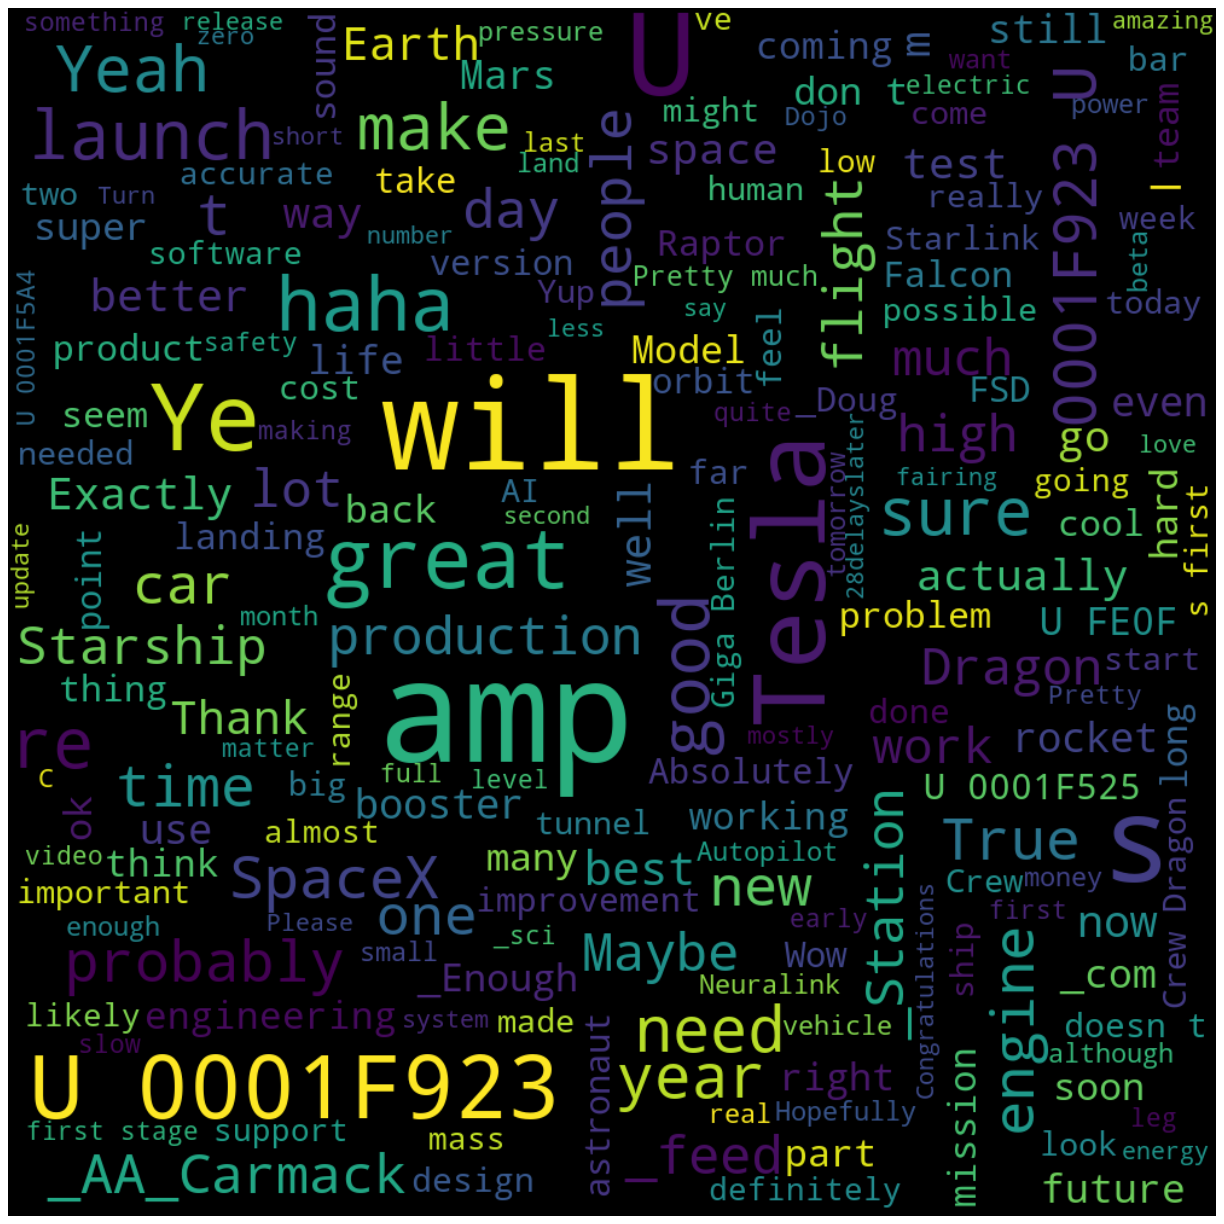

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([txts for txts in elon["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [21]:
positive_tweets = elon2[elon2['Polarity'] >0]
negative_tweets = elon2[elon2['Polarity'] < 0]
neutral_tweets = elon2[elon2['Polarity'] == 0]
print('Positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])
print('\n')
print('Negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])
print("\n")
print('Neutral tweets')
for i, row in neutral_tweets[:5].iterrows():
  print(' -' + row['Text'])

Positive tweets
 -  Great interview!
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! 
 -_  10 Haha thanks :)
 -The most entertaining outcome is the most likely


Negative tweets
 -11 I�m an alien
 - Your app sucks
 - _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don� 
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or� 
 - Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

That�s what you�re missing.


Neutral tweets
 -_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
 -27 Doge is underestimated
 -Frodo was the underdoge,
All thought he would fail,
Himself most of all. 
 - 10 Indeed! Tweets definitely do not represent real-world time allocation.
 - Just sent some


In [22]:
elon_twt_string = allwords

elon_twt_string = re.sub("[^A-Za-z" "]+"," ",elon_twt_string).lower()
elon_twt_string = re.sub("[0-9" "]+"," ",elon_twt_string)

elon_tweet_words = elon_twt_string.split(" ")

stop_words = stopwords.words('english')
elon_tweet_words = [w for w in elon_tweet_words if not w in stop_words]
elon_twt_string = " ".join(elon_tweet_words)

In [23]:
with open("/Users/apple/Downloads/positive-words.txt","r",encoding='latin-1') as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[36:]


# negative words  Choose path for -ve words stored in system
with open("/Users/apple/Downloads/negative-words.txt","r",encoding='latin-1') as neg:
  negwords = neg.read().split("\n")

negwords = negwords[37:]


In [24]:
elon_neg_in_neg = " ".join ([txt for txt in elon_tweet_words if txt in negwords])
elon_neg_in_neg

' fail issues sucks difficult negative inflationary misleading pain intense hang scratch burn throttle risk foolish destroyer dumb hard weird unusually inevitable die apologists bs broken annoying hedge trap discord wild discord crazy tyranny hell bad sorry confusion fallout unfavorable problem stuck toxic fallout twist knife hard excruciating static steal sue burns suicide hate junkyard unhappy sick critical unfortunately hard strange dumb falling pain ignore hard tank odd opposition opposition wack trouble weird hazard sneaky critical sick nightmare unfortunately fall bugs wrong strange hard twisted crazy bs tank mania grumpy incorrect nightmare slow crazy funny impossible slow tank burn tanks lapse knock knock bad boring cold hell problems static risky static sad savage risk static bad irony hates hypocrisy joke strange problem stole wild unfortunately bug slow cold overkill marginal irony dust blow bad irony irony damn skeptic symptoms fatigue symptoms insanely bad pointless hell c

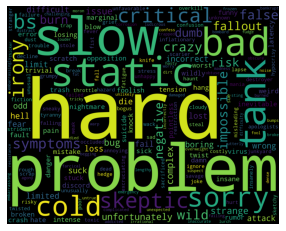

In [25]:
elon_neg_in_neg = " ".join ([txt for txt in elon_tweet_words if txt in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=2000,
                      height=1600
                     ).generate(elon_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)
plt.axis("off")

plt.show()

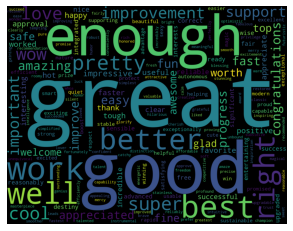

In [26]:
elon_pos_in_pos = " ".join ([w for w in elon_tweet_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(elon_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)
plt.axis("off")
plt.show()

In [27]:
len(elon_pos_in_pos)

6160

In [28]:
len(elon_neg_in_neg)

3018

In [29]:
len(elon_tweet_words)

11362

In [30]:
6160/11362

0.5421580707621898

In [31]:
3018/11362

0.265622249603943

In [60]:
# how many words are in the sentence?
elon['word_count'] = elon['Text'].str.split().apply(len)
elon['word_count'].head(10)

1      4
2     13
3      2
4      4
5     16
6      6
7     13
8      5
9     10
10     8
Name: word_count, dtype: int64

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='Sentiment'>

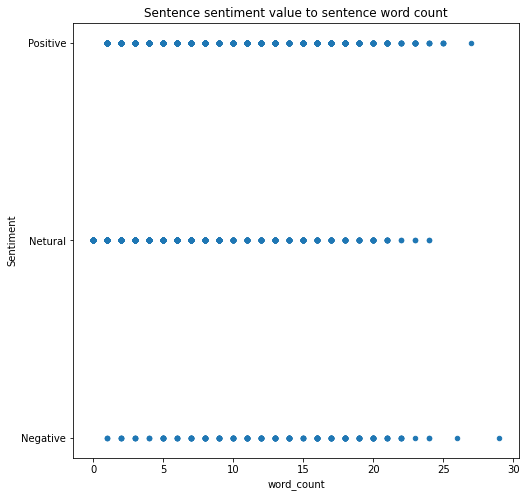

In [62]:
elon.plot.scatter(x='word_count', y='Sentiment', figsize=(8,8), title='Sentence sentiment value to sentence word count')